In [1]:
import re, time, warnings, os, sys, copy
import gzip, pickle

import numpy as np
import pandas as pd
import gzip, pickle
import scipy, sklearn, mne

import auxiliary as aux
import data, rsa
sys.path.append('../spaces/')
import embeddings as emb
import pubplot as pub
import matplotlib.pyplot as plt

pub.styles.set()
C = pub.colours.equidistant('tab20c', k = 20)

## Supplementary Figure 1, Supplementary Tables 1-2
This notebook will generate supplementary figure 1 and supplementary tables 1-2. In brief, this gives all relevant information for behavioural modelling in the online experiment and EEG experiment.

In [2]:
'''
Create table 1
'''

df = pd.read_csv(f'../exp2/results/glmm/summary.csv')

name = ['(Intercept)', '$t$', '$\kappa$', 'fit', '$t\times\kappa$', '$t\times$ fit']
estimate = [np.round(x, 2) for x in df['Estimate']]
se = [np.round(x, 2) for x in df['Std. Error']]
z = [np.round(x, 2) for x in df['z value']]
p = df['Pr(>|z|)']

table = {'Coefficient': name, 'Estimate': estimate, 'Std. Error': se, '$z$-value': z, '$p$-value': p}
table = pd.DataFrame.from_dict(table)

print(table.to_latex(index = False))

\begin{tabular}{lrrrr}
\toprule
    Coefficient &  Estimate &  Std. Error &  \$z\$-value &    \$p\$-value \\
\midrule
    (Intercept) &      0.27 &        0.06 &       4.42 & 9.824392e-06 \\
            \$t\$ &     -0.04 &        0.03 &      -1.47 & 1.413237e-01 \\
       \$\textbackslash kappa\$ &     -0.62 &        0.11 &      -5.81 & 6.261726e-09 \\
            fit &      1.64 &        0.12 &      13.11 & 2.712021e-39 \\
\$t\textbackslash times\textbackslash kappa\$ &      0.39 &        0.06 &       6.09 & 1.135522e-09 \\
  \$t\textbackslash times\$ fit &      0.43 &        0.03 &      12.77 & 2.405336e-37 \\
\bottomrule
\end{tabular}



/var/folders/b4/qysvl6jd4995kp_qql3yj3880000gn/T/ipykernel_68657/2196559020.py:16: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex(index = False))


In [3]:
'''
Create table 2
'''

df = pd.read_csv(f'./data/processed/beh/mt1/summary.csv')

name = ['(Intercept)', '$t$', '$\kappa$', 'fit', '$t\times\kappa$', '$t\times$ fit']
estimate = [np.round(x, 2) for x in df['Estimate']]
se = [np.round(x, 2) for x in df['Std. Error']]
z = [np.round(x, 2) for x in df['z value']]
p = df['Pr(>|z|)']

table = {'Coefficient': name, 'Estimate': estimate, 'Std. Error': se, '$z$-value': z, '$p$-value': p}
table = pd.DataFrame.from_dict(table)

print(table.to_latex(index = False))

\begin{tabular}{lrrrr}
\toprule
    Coefficient &  Estimate &  Std. Error &  \$z\$-value &    \$p\$-value \\
\midrule
    (Intercept) &      0.10 &        0.04 &       2.61 & 9.049547e-03 \\
            \$t\$ &     -0.21 &        0.03 &      -7.63 & 2.335679e-14 \\
       \$\textbackslash kappa\$ &     -0.24 &        0.08 &      -3.10 & 1.947376e-03 \\
            fit &      0.76 &        0.04 &      18.83 & 4.070923e-79 \\
\$t\textbackslash times\textbackslash kappa\$ &      0.34 &        0.06 &       5.94 & 2.782375e-09 \\
  \$t\textbackslash times\$ fit &      0.28 &        0.03 &       9.97 & 2.050396e-23 \\
\bottomrule
\end{tabular}



/var/folders/b4/qysvl6jd4995kp_qql3yj3880000gn/T/ipykernel_68657/4001480878.py:16: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex(index = False))


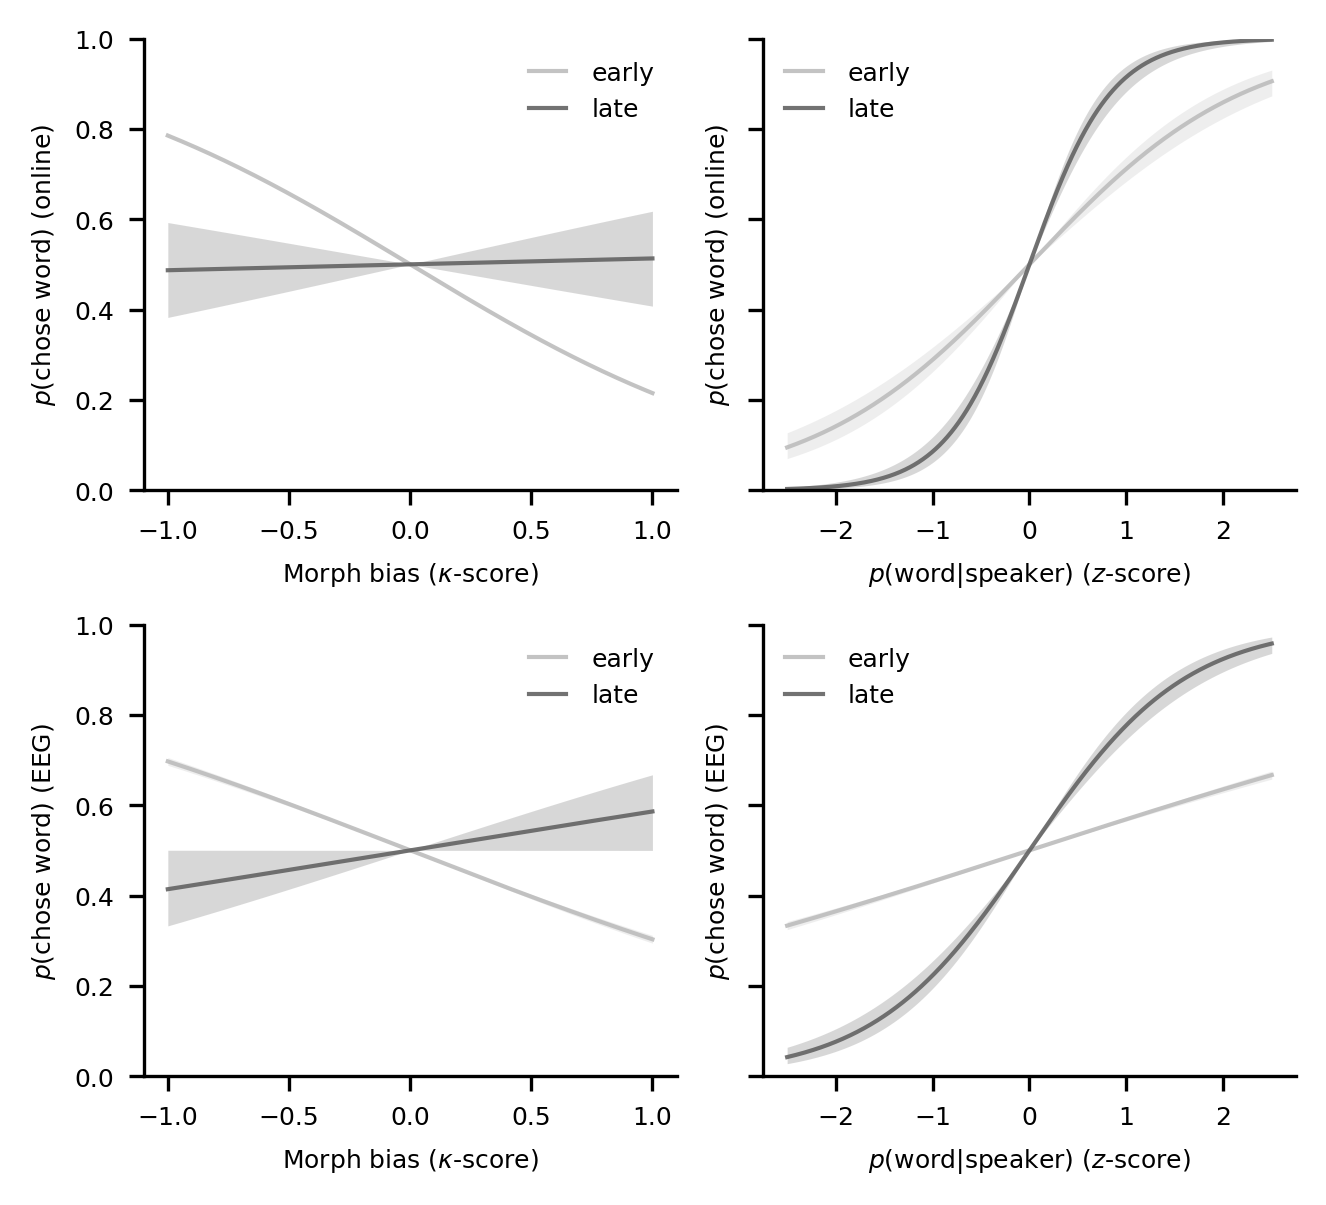

In [25]:
'''
Create fig1
'''

d1 = pd.read_csv(f'../exp2/results/glmm/fitted.csv')
m1 = pub.model.read(f'../exp2/results/glmm/summary.csv', properties = ['ß', 'se', 'z', 'p'])

d2 = pd.read_csv(f'./data/processed/beh/mt1/fitted.csv')
m2 = pub.model.read(f'./data/processed/beh/mt1/summary.csv', properties = ['ß', 'se', 'z', 'p'])

fig, ax = pub.figure(nrows = 2, ncols = 2, sharey = True)

z_no = np.linspace(np.min(d2.z_no.tolist()), np.max(d2.z_no.tolist()), int(1e3))
kappa = np.linspace(-1, 1, int(1e3))
z_fit = np.linspace(-2.5, 2.5, int(1e3))

'''
exp1: kappa
'''

pub.ribbon.from_coef(kappa, [(m1.kappa.ß, m1.kappa.se, kappa),
                             (m1.time_by_kappa.ß, m1.time_by_kappa.se, z_no.min() * kappa)], 
                     CI = 1.96, link = pub.link.logit, 
                     ribbon = dict(color = C[18]), mean = dict(color = C[18], label = r'early'), ax = ax[0,0])
pub.ribbon.from_coef(kappa, [(m1.kappa.ß, m1.kappa.se, kappa),
                             (m1.time_by_kappa.ß, m1.time_by_kappa.se, z_no.max() * kappa)], 
                     CI = 1.96, link = pub.link.logit, 
                     ribbon = dict(color = C[16]), mean = dict(color = C[16], label = r'late'), ax = ax[0,0])

ax[0,0].set_ylabel(r'$p($chose word$)$ (online)')
ax[0,0].set_xlabel(r'Morph bias ($\kappa$-score)')
pub.cosmetics.legend(ax = ax[0,0], loc = 'upper right')

'''
exp1: fit
'''

pub.ribbon.from_coef(z_fit, [(m1.fit_a.ß, m1.fit_a.se, z_fit),
                             (m1.time_by_fit_a.ß, m1.time_by_fit_a.se, z_no.min() * z_fit)], 
                     CI = 1.96, link = pub.link.logit, 
                     ribbon = dict(color = C[18]), mean = dict(color = C[18], label = r'early'), ax = ax[0,1])
pub.ribbon.from_coef(z_fit, [(m1.fit_a.ß, m1.fit_a.se, z_fit),
                             (m1.time_by_fit_a.ß, m1.time_by_fit_a.se, z_no.max() * z_fit)], 
                     CI = 1.96, link = pub.link.logit, 
                     ribbon = dict(color = C[16]), mean = dict(color = C[16], label = r'late'), ax = ax[0,1])
ax[0,1].set_ylabel(r'$p($chose word$)$ (online)')
ax[0,1].set_xlabel(r'$p($word$\vert$speaker$)$ ($z$-score)')
pub.cosmetics.legend(ax = ax[0,1], loc = 'upper left')

'''
exp2: kappa
'''

pub.ribbon.from_coef(kappa, [(m2.kappa.ß, m2.kappa.se, kappa),
                             (m2.z_no_by_kappa.ß, m2.z_no_by_kappa.se, z_no.min() * kappa)], 
                     CI = 1.96, link = pub.link.logit, 
                     ribbon = dict(color = C[18]), mean = dict(color = C[18], label = r'early'), ax = ax[1,0])
pub.ribbon.from_coef(kappa, [(m2.kappa.ß, m2.kappa.se, kappa),
                             (m2.z_no_by_kappa.ß, m2.z_no_by_kappa.se, z_no.max() * kappa)], 
                     CI = 1.96, link = pub.link.logit, 
                     ribbon = dict(color = C[16]), mean = dict(color = C[16], label = r'late'), ax = ax[1,0])

ax[1,0].set_ylabel(r'$p($chose word$)$ (EEG)')
ax[1,0].set_xlabel(r'Morph bias ($\kappa$-score)')
pub.cosmetics.legend(ax = ax[1,0], loc = 'upper right')

'''
exp2: fit
'''

pub.ribbon.from_coef(z_fit, [(m2.z_fit.ß, m2.z_fit.se, z_fit),
                             (m2.z_no_by_z_fit.ß, m2.z_no_by_z_fit.se, z_no.min() * z_fit)], 
                     CI = 1.96, link = pub.link.logit, 
                     ribbon = dict(color = C[18]), mean = dict(color = C[18], label = r'early'), ax = ax[1,1])
pub.ribbon.from_coef(z_fit, [(m2.z_fit.ß, m2.z_fit.se, z_fit),
                             (m2.z_no_by_z_fit.ß, m2.z_no_by_z_fit.se, z_no.max() * z_fit)], 
                     CI = 1.96, link = pub.link.logit, 
                     ribbon = dict(color = C[16]), mean = dict(color = C[16], label = r'late'), ax = ax[1,1])
ax[1,1].set_ylabel(r'$p($chose word$)$ (EEG)')
ax[1,1].set_xlabel(r'$p($word$\vert$speaker$)$ ($z$-score)')
pub.cosmetics.legend(ax = ax[1,1], loc = 'upper left')

ax[1,1].set_ylim([0, 1])

pub.cosmetics.finish()

fig.savefig(f'./figures/png/suppfig1_behmods.png', dpi = 300)
fig.savefig(f'./figures/svg/suppfig1_behmods.svg')
fig.savefig(f'./figures/pdf/suppfig1_behmods.pdf')